# K Means Clustering

In [1]:
# Import libraries, set up initial dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

In [2]:
# Generate 3 random centroids
np.random.seed(200)
k = 3
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(0, 80), np.random.randint(0, 80)] for i in range(k)
}

In [3]:
centroids

{1: [26, 16], 2: [68, 42], 3: [55, 76]}

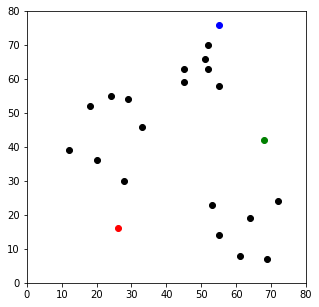

In [4]:
# Plot initial config
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [8]:
# Create a function that calculates Euclidean distance to each
# of the centroids

def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 + (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

In [9]:
df = assignment(df, centroids)
df

,x,y,distance_from_1,distance_from_2,distance_from_3,closest,color
0,12,39,26.925824,56.080300,56.727418,1,r
1,20,36,20.880613,48.373546,53.150729,1,r
2,28,30,14.142136,41.761226,53.338541,1,r
3,18,52,36.878178,50.990195,44.102154,1,r
4,29,54,38.118237,40.804412,34.058773,3,b
5,33,46,30.805844,35.227830,37.202150,1,r
6,24,55,39.051248,45.880279,37.443290,3,b
7,45,59,47.010637,28.600699,19.723083,3,b
8,45,63,50.695167,31.144823,16.401219,3,b
9,52,70,59.933296,32.249031,6.708204,3,b


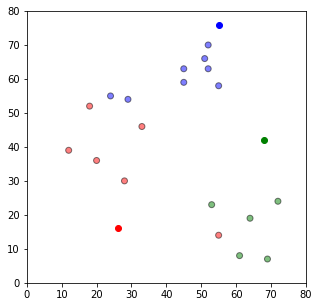

In [10]:
# Plot the first iteration, coloring a point based on its closest centroid

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [11]:
# Be careful re-running this code block

import copy
old_centroids = copy.deepcopy(centroids)

In [12]:
def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

In [13]:
# Be careful re-running this code block

centroids = update(centroids)

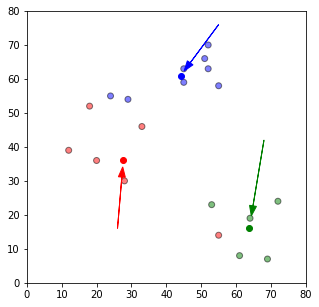

In [14]:
# Now that we've updated the centroids, plot the distance vector change of
# the centroid

fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

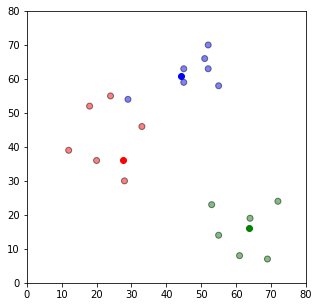

In [15]:
# Now that we have new centroids, recompute the clusters

df = assignment(df, centroids)

# Plot results
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

2


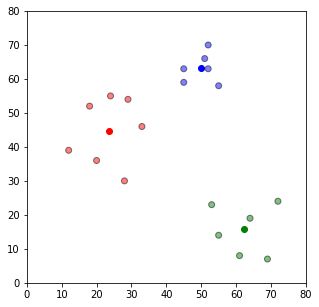

In [16]:
# Clearly we'll have to iterate:
n = 0
while True:
    n += 1
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break
print(n)
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [17]:
# Don't worry, scikit learn can do the same thing in like 3 lines

df2 = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(df2)

KMeans(n_clusters=3)

In [18]:
labels = kmeans.predict(df2)
centroids = kmeans.cluster_centers_

In [19]:
labels

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [20]:
colors = []
for i in labels:
  if i == 1:
    colors.append('g')
  elif i == 2:
    colors.append('b')
  elif i == 0:
    colors.append('r')

colors

['g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r']

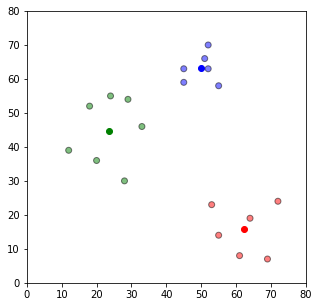

In [21]:
fig = plt.figure(figsize=(5, 5))
# BTW if you're copying their code from the link, it'll break on the next line
# you need to get the colors from the labels yourself
#colors = ['g', 'g', 'g', 'g', 'g', 'g', 'g', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'r', 'r', 'r', 'r', 'r']
# bad prof k

plt.scatter(df2['x'], df2['y'], color=colors, alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [22]:
labels

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0],
      dtype=int32)

KMeans with Iris dataset

In [23]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [24]:
# let's start with sepal length only
iris = datasets.load_iris()
sepals = iris.data[:,:2]
Y = iris.target

Text(0, 0.5, 'Sepal Width')

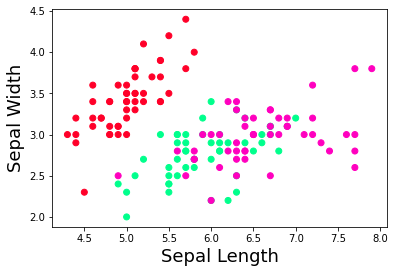

In [25]:
# Plot the whole dataset (3 columns) x and y coordinates
# The color will be the 'target' (just 0,1, or 2)

plt.scatter(sepals[:,0], sepals[:,1], c=Y, cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

In [26]:
kmeans_iris = KMeans(n_clusters=3)
kmeans_iris.fit(sepals)

KMeans(n_clusters=3)

Text(0.5, 1.0, 'Predicted')

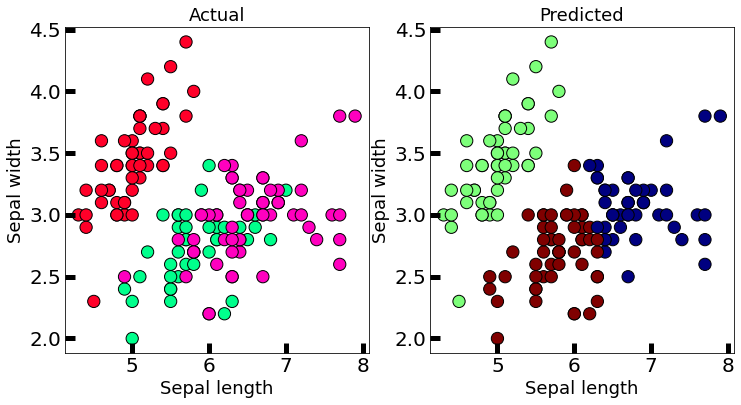

In [27]:
#this will tell us to which cluster does the data observations belong.
new_labels = kmeans_iris.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(12,6))
axes[0].scatter(sepals[:, 0], sepals[:, 1], c=Y, cmap='gist_rainbow', edgecolor='k', s=150)
axes[1].scatter(sepals[:, 0], sepals[:, 1], c=new_labels, cmap='jet', edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

In [28]:
# Looks kind of like we should calculate a confusion matrix!

print("Predicted")
print(kmeans_iris.labels_)
print("Actual")
print(Y)

Predicted
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2
 0 0 0 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
Actual
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Confusion matrix, without normalization
[[ 0 50  0]
 [12  0 38]
 [35  0 15]]
Normalized confusion matrix
[[0.   1.   0.  ]
 [0.24 0.   0.76]
 [0.7  0.   0.3 ]]


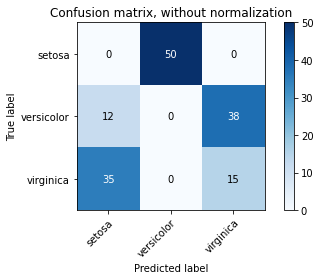

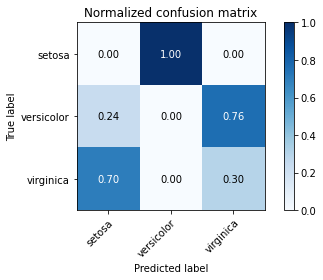

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)
class_names = iris.target_names

# Plot non-normalized confusion matrix
plot_confusion_matrix(Y, kmeans_iris.labels_, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(Y, kmeans_iris.labels_, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# DBSCAN

In [49]:
# Using same data as before:
import pandas as pd
df3 = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

from sklearn.cluster import DBSCAN
# How to choose EPS?
clustering = DBSCAN(eps=8, min_samples=2).fit(df3)
colors = clustering.labels_

print(colors)

[-1 -1 -1  0  0 -1  0  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1]


In [50]:
colors = []
for i in clustering.labels_:
  if i == 1:
    colors.append('g')
  elif i == 2:
    colors.append('b')
  elif i == -1:
    colors.append('black')
  elif i == 0:
    colors.append('r')

colors

['black',
 'black',
 'black',
 'r',
 'r',
 'black',
 'r',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black']

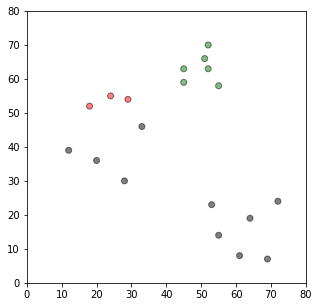

In [51]:
import matplotlib.pyplot as plt
#colors = ['g', 'g', 'g', 'g', 'g', 'g', 'g', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'r', 'r', 'r', 'r', 'r']

fig = plt.figure(figsize=(5, 5))
plt.scatter(df3['x'], df3['y'], color=colors, alpha=0.5, edgecolor='k')

plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

# DBSCAN example 2

In [34]:
# Install some things

!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     / 129.7 MB 82 kB/s
ERROR: File "setup.py" not found for legacy project https://github.com/matplotlib/basemap/archive/master.zip.


In [35]:
# Downgrade version

!pip install pyproj==1.9.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.8 MB 25.7 MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp37-cp37m-linux_x86_64.whl size=3702542 sha256=1e771c021b96ba23d9cb34fb1180e76db042d25a495d9afd62d863f708152c73
  Stored in directory: /root/.cache/pip/wheels/08/60/55/38382877bab48a6abfca7bd66115e287ce5a9530cbce631771
Successfully built pyproj


In [36]:
!wget https://raw.githubusercontent.com/suvoooo/Machine_Learning/master/DBSCAN_Complete/weather-stations.csv

--2022-10-17 16:29:59--  https://raw.githubusercontent.com/suvoooo/Machine_Learning/master/DBSCAN_Complete/weather-stations.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 129821 (127K) [text/plain]
Saving to: ‘weather-stations.csv’

weather-stations.cs 100%[===================>] 126.78K  --.-KB/s    in 0.003s  

2022-10-17 16:29:59 (44.7 MB/s) - ‘weather-stations.csv’ saved [129821/129821]



In [37]:
!ls

sample_data  weather-stations.csv


In [3]:
import pandas as pd

weather_df = pd.read_csv('weather-stations.csv')
weather_df.head()

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573


In [4]:
# Drop rows with n/a values
weather_df.dropna(subset=['Tm', 'Tx', 'Tn'], inplace=True)

In [11]:
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.5.4-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

PREFIX=/usr/local
installing: python-3.6.5-hc3d631a_2 ...
installing: ca-certificates-2018.03.07-0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: libgcc-ng-7.2.0-hdf63c60_3 ...
installing: libstdcxx-ng-7.2.0-hdf63c60_3 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: ncurses-6.1-hf484d3e_0 ...
installing: openssl-1.0.2o-h20670df_0 ...
installing: tk-8.6.7-hc745277_3 ...
installing: xz-5.2.4-h14c3975_4 ...
installing: yaml-0.1.7-had09818_2 ...
installing: zlib-1.2.11-ha838bed_2 ...
installing: libedit-3.1.20170329-h6b74fdf_2 ...
installing: readline-7.0-ha6073c6_4 ...
installing: sqlite-3.23.1-he433501_0 ...
installing: asn1crypto-0.24.0-py36_0 ...
installing: certifi-2018.4.16-py36_0 ...
installing: chardet-3.0.4-py36h0f667ec_1 ...
installing: idna-2.6-py36h82fb2a8_1 ...
installing: pycosat-0.6.3-py36h0a5515d_0 ...
installing: pycparser-2.18-py36hf9f622e_1 ...
installing: pysocks-1.6.8-py36_0 ...
installing: ruamel_yaml-0.15.37-py36h14c3975_2 ...
installing: six-1.11

--2022-10-17 16:37:58--  https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh [following]
--2022-10-17 16:37:58--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58468498 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.4-Linux-x86_64.sh’

     0K .......... .......... .......... .......... ..........  0% 65.5M 1s
    50K .......... .......... .......... .......... ..........  0%

In [12]:
%%bash
conda install --channel defaults conda python=3.6 --yes
conda update --channel defaults --all --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs: 
    - conda
    - python=3.6


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    idna-3.3                   |     pyhd3eb1b0_0          55 KB
    conda-4.10.3               |   py36h06a4308_0         3.1 MB
    cffi-1.14.6                |   py36h400218f_0         224 KB
    pycosat-0.6.3              |   py36h27cfd23_0         107 KB
    readline-8.1.2             |       h7f8727e_1         423 KB
    wheel-0.37.1               |     pyhd3eb1b0_0          31 KB
    ld_impl_linux-64-2.38      |       h1181459_1         732 KB
    tqdm-4.63.0                |     pyhd3eb1b0_0          80 KB
    ncurses-6.3                |       h5eee18b_3         1.1 MB
    colorama-0.4.4             |     pyhd3eb1b0_0          21 KB
    yaml-0.2.5                 |       h7b6447c_0   

idna-3.3             |   55 KB | ########## | 100% 
conda-4.10.3         |  3.1 MB | ########## | 100% 
cffi-1.14.6          |  224 KB | ########## | 100% 
pycosat-0.6.3        |  107 KB | ########## | 100% 
readline-8.1.2       |  423 KB | ########## | 100% 
wheel-0.37.1         |   31 KB | ########## | 100% 
ld_impl_linux-64-2.3 |  732 KB | ########## | 100% 
tqdm-4.63.0          |   80 KB | ########## | 100% 
ncurses-6.3          |  1.1 MB | ########## | 100% 
colorama-0.4.4       |   21 KB | ########## | 100% 
yaml-0.2.5           |   87 KB | ########## | 100% 
pip-21.2.2           |  2.1 MB | ########## | 100% 
zlib-1.2.12          |  124 KB | ########## | 100% 
charset-normalizer-2 |   33 KB | ########## | 100% 
python-3.6.13        | 32.5 MB | ########## | 100% 
libffi-3.3           |   54 KB | ########## | 100% 
libgcc-ng-11.2.0     |  8.5 MB | ########## | 100% 
tk-8.6.12            |  3.3 MB | ########## | 100% 
libstdcxx-ng-11.2.0  |  6.1 MB | ########## | 100% 
pycparser-2.

In [13]:
import sys
sys.path

['/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython']

In [14]:
import sys
_ = (sys.path
        .append("/usr/local/lib/python3.6/site-packages"))

In [15]:
!conda install -c conda-forge basemap

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / failed with initial frozen solve. Retrying with flexible solve.
Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - 

In [16]:
from mpl_toolkits.basemap import Basemap
import matplotlib
from PIL import Image
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)
import numpy as np

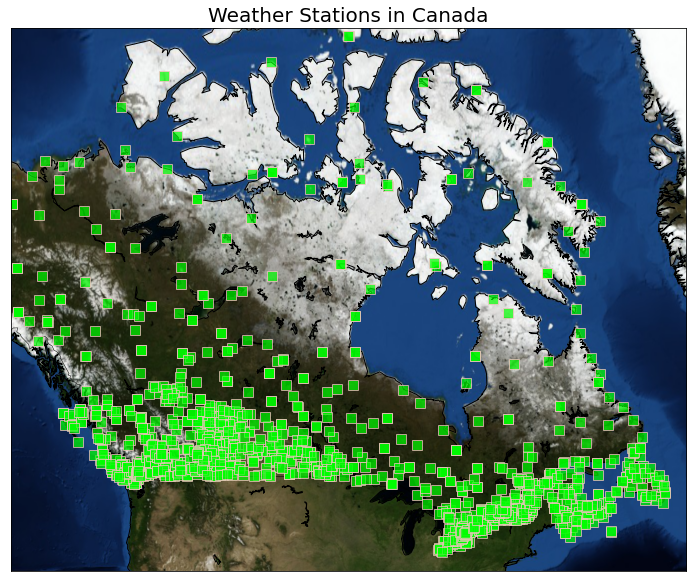

In [21]:
# Bounding box for the map to be displayed
llon=-140
ulon=-50
llat=40
ulat=75

# selecting the boundaries of the map from lattitude and longitude 

weather_df = weather_df[(weather_df['Long'] > llon) & (weather_df['Long'] < ulon) & 
                        (weather_df['Lat'] > llat) &(weather_df['Lat'] < ulat)]


# Draw a mercator projection of the weather data

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

# A couple of Basemap  configurations

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawlsmask(land_color='orange', ocean_color='skyblue')
#my_map.shadedrelief()
my_map.bluemarble()


# To collect data based on stations        

xs,ys = my_map(np.asarray(weather_df.Long), np.asarray(weather_df.Lat))
weather_df['xm']= xs.tolist()
weather_df['ym'] =ys.tolist()

#Visualization1
for index, row in weather_df.iterrows():
   my_map.plot(row.xm, row.ym,markerfacecolor ='lime',markeredgecolor='pink', marker='s', markersize= 10, alpha = 0.7)

    #plt.text(x,y,stn)
plt.title("Weather Stations in Canada", fontsize=20)
plt.savefig("Canada_WS.png", dpi=300)
plt.show()


In [22]:
# We will now cluster these stations by weather

# Let's understand our data

print ("Minimum Mean temperature: ", weather_df['Tm'].min())
print ("Minimum Max Temperature: ", weather_df['Tx'].min())
print ("Maximun Min Temperature: ", weather_df['Tn'].max())

Minimum Mean temperature:  -37.0
Minimum Max Temperature:  -28.9
Maximun Min Temperature:  5.3


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


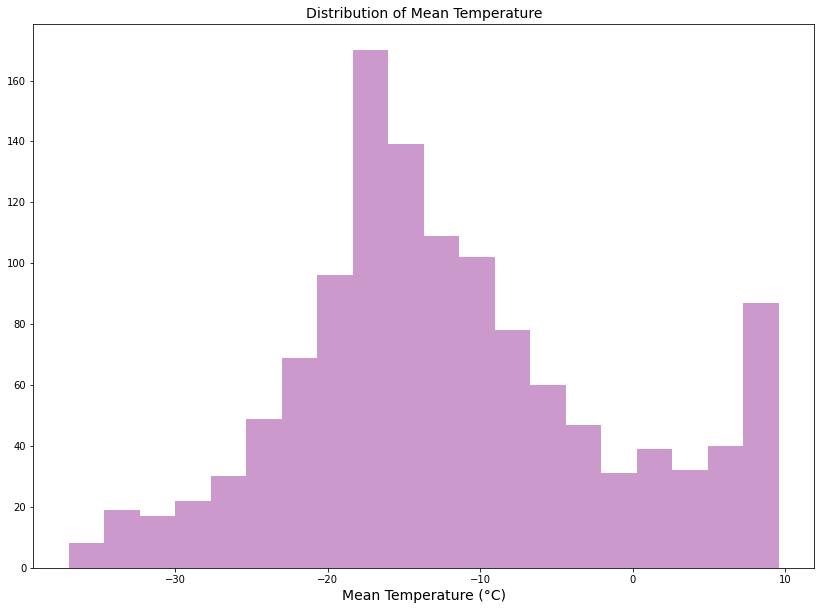

In [23]:
# Fairly easy histogram
import seaborn as sns

sns.distplot(weather_df['Tm'], color='purple', kde=False)
plt.xlabel('Mean Temperature (°C)', fontsize=14)
plt.title("Distribution of Mean Temperature", fontsize=14)
plt.savefig("Dist_of_Mean_Temp.png", dpi=200)
plt.show()

In [24]:
# The demo notebook has a couple more cool plots, let's just get to clustering

from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

# Tm = mean temperature
# Tx = max temperature
# Tn = min tempperature

weather_df_clus_temp = weather_df[["Tm", "Tx", "Tn", "xm", "ym"]]
weather_df_clus_temp = StandardScaler().fit_transform(weather_df_clus_temp)

# Set up a simple sklearn DBScan
db = DBSCAN(eps=0.3, min_samples=10).fit(weather_df_clus_temp)
labels = db.labels_

print (labels[500:560]) # Just grab 60 of them to check them I guess?

# Create a new column in the dataframe for the DBScan derived labels
weather_df["Clus_Db"] = labels

realClusterNum = len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

[ 4  4  4  4  4  4  4  4  4  3  4  3  4  3  4  4  4  4  4  4  4  4  4  4
  4  4 -1  4  4  4 -1  4 -1  3 -1  4 -1  3  3  3  3  3  3  3  3  3  3  3
 -1 -1  3  3  3  3 -1  3  3  3  3  3]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Cluster 0, Average Mean Temp: 6.2406779661016945
Cluster 1, Average Mean Temp: -0.5523809523809524
Cluster 2, Average Mean Temp: -3.244444444444445
Cluster 3, Average Mean Temp: -13.733725490196077
Cluster 4, Average Mean Temp: -4.153703703703704
Cluster 5, Average Mean Temp: -16.401294498381876
Cluster 6, Average Mean Temp: -10.08421052631579
Cluster 7, Average Mean Temp: -4.706250000000001


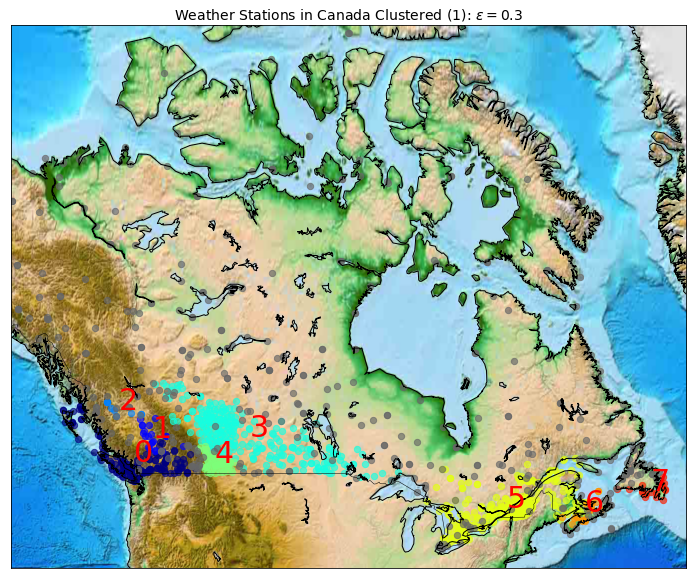

In [25]:
# Now plot the map again, but with the DBScan labels

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
#my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.drawlsmask(land_color='orange', ocean_color='skyblue')
#my_map.shadedrelief()
#my_map.bluemarble()
#my_map.shadedrelief()
my_map.etopo()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = weather_df[weather_df.Clus_Db == clust_number]   
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 40, alpha = 0.65)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm)
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=30, color='red',)
        print ("Cluster "+str(clust_number)+', Average Mean Temp: '+ str(np.mean(clust_set.Tm)))
plt.title(r"Weather Stations in Canada Clustered (1): $ \epsilon = 0.3$", fontsize=14)        
plt.savefig("etopo_cluster.png", dpi=300)

In [26]:
# Now factor in precipitation, P

# stop the SettingWithCopyWarning: 
pd.options.mode.chained_assignment = None  # default='warn'
#

from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
weather_df_copy = weather_df.copy()
weather_df_clus_temp_P = weather_df_copy[["Tm", "Tx", "Tn", "xm", "ym", "P"]]

weather_df_clus_temp_P.dropna(subset=["Tm", "Tx", "Tn", "xm", "ym", "P"], inplace=True)
print ("After Dropping Rows that contains NaN on Precipitation Column: ", weather_df_clus_temp_P.shape)

print (weather_df_clus_temp_P.head(6))

After Dropping Rows that contains NaN on Precipitation Column:  (1136, 6)
    Tm    Tx   Tn            xm            ym      P
0  8.2  13.5  1.0  1.807806e+06  1.396332e+06  178.8
1  7.0  15.0 -3.0  1.764329e+06  1.377564e+06  258.6
2  6.8  16.0 -2.5  1.773336e+06  1.378409e+06  264.6
4  7.7  14.5 -1.0  1.809363e+06  1.362546e+06  168.4
5  8.8  13.1  1.9  1.841498e+06  1.311615e+06   81.0
6  8.9  13.5  2.0  1.826598e+06  1.404800e+06  110.0


In [27]:
#print (weather_df_clus_temp.shape)
weather_df_clus_temp_P_arr = weather_df_clus_temp_P[["Tm", "Tx", "Tn", "xm", "ym", "P"]]
weather_df_clus_temp_P_arr = StandardScaler().fit_transform(weather_df_clus_temp_P_arr)

db_P = DBSCAN(eps=0.5, min_samples=10).fit(weather_df_clus_temp_P_arr)
# # create an array of zeroes of same size as db.labels_. db.labels_ is an array containing labels for 
labels_P = db_P.labels_
print(labels_P[500:560])
print (labels_P.dtype)
#print(np.isnan(labels_P).any())
weather_df_clus_temp_P["Clus_Db_"]=labels_P

[ 1  1  1 -1 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1 -1 -1  1 -1
 -1 -1  1 -1 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1]
int64


In [28]:
realClusterNum_P=len(set(labels_P)) - (1 if -1 in labels_P else 0)
clusterNum_P = len(set(labels_P)) 


print (set(labels_P))

{0, 1, 2, 3, -1}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Cluster 0, Average Mean Temp: 7.680246913580247
Cluster 0, Average Mean Precipitation: 126.10000000000002
Cluster 1, Average Mean Temp: -12.53424283765348
Cluster 1, Average Mean Precipitation: 27.415006821282404
Cluster 2, Average Mean Temp: -26.142857142857135
Cluster 2, Average Mean Precipitation: 8.7
Cluster 3, Average Mean Temp: -10.406666666666666
Cluster 3, Average Mean Precipitation: 146.02333333333334


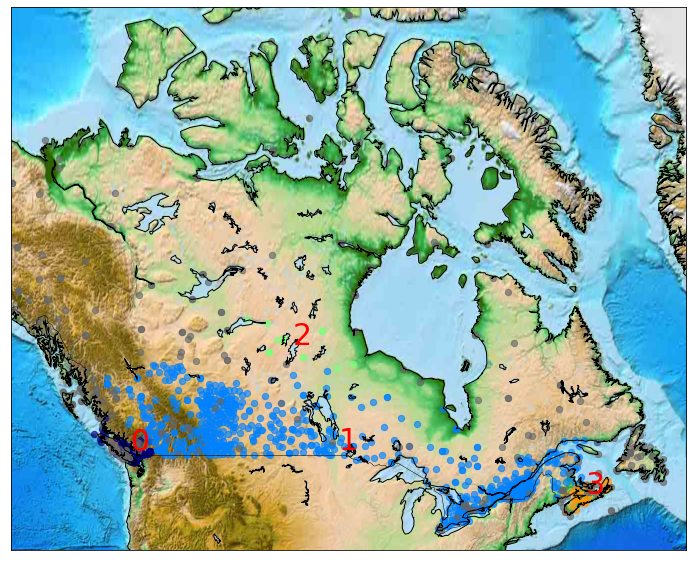

In [29]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map1 = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map1.drawcoastlines()
my_map1.drawcountries()
#my_map.drawmapboundary()
#my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map1.drawlsmask(land_color='orange', ocean_color='skyblue')
#my_map.shadedrelief()
#my_map.bluemarble()
#my_map.shadedrelief()
my_map1.etopo()

# To create a color map
colors1 = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum_P))



#Visualization1
for clust_number_P in set(labels_P):
    c=(([0.4,0.4,0.4]) if clust_number_P == -1 else colors1[np.int(clust_number_P)])
    clust_set_P = weather_df_clus_temp_P[weather_df_clus_temp_P.Clus_Db_ == clust_number_P]                    
    my_map.scatter(clust_set_P.xm, clust_set_P.ym, color =c,  marker='o', s= 40, alpha = 0.65)
    if clust_number_P != -1:
        cenx=np.mean(clust_set_P.xm) 
        ceny=np.mean(clust_set_P.ym) 
        plt.text(cenx,ceny,str(clust_number_P), fontsize=30, color='red',)
        print ("Cluster "+str(clust_number_P)+', Average Mean Temp: '+ str(np.mean(clust_set_P.Tm)))
        print ("Cluster "+str(clust_number_P)+', Average Mean Precipitation: '+ str(np.mean(clust_set_P.P)))
plt.savefig("etopo_cluster_preci.png", dpi=300)

# Principal Component Analysis

In [30]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [31]:
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [32]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [33]:
# Do the PCA
from sklearn.decomposition import PCA
# For beginners, only specify the number of desired components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

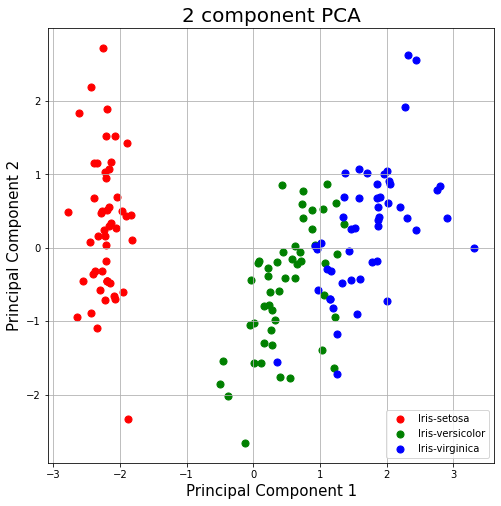

In [34]:
# Annnnd plot it
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()